In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/iris-dataset/Iris.csv')

In [3]:
data.sample(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,131,7.4,2.8,6.1,1.9,Iris-virginica
45,46,4.8,3.0,1.4,0.3,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
125,126,7.2,3.2,6.0,1.8,Iris-virginica
8,9,4.4,2.9,1.4,0.2,Iris-setosa
117,118,7.7,3.8,6.7,2.2,Iris-virginica
73,74,6.1,2.8,4.7,1.2,Iris-versicolor
139,140,6.9,3.1,5.4,2.1,Iris-virginica
28,29,5.2,3.4,1.4,0.2,Iris-setosa
38,39,4.4,3.0,1.3,0.2,Iris-setosa


In [4]:
data.shape

(150, 6)

In [5]:
data.duplicated().sum() 

0

In [6]:
data.isnull().sum() 

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [7]:
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


<Axes: xlabel='Species', ylabel='count'>

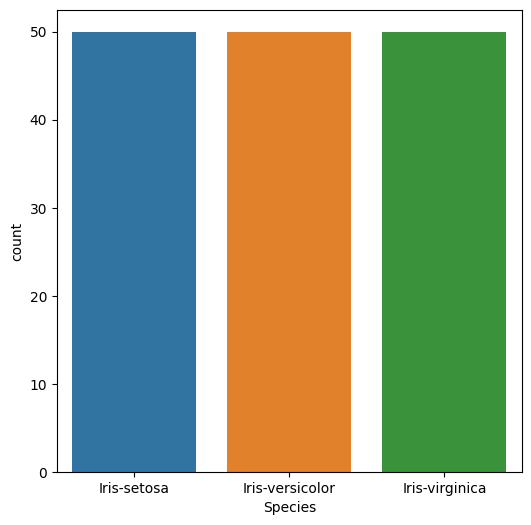

In [9]:
plt.figure(figsize=(6,6)) 
sns.countplot(x='Species',data=data) 

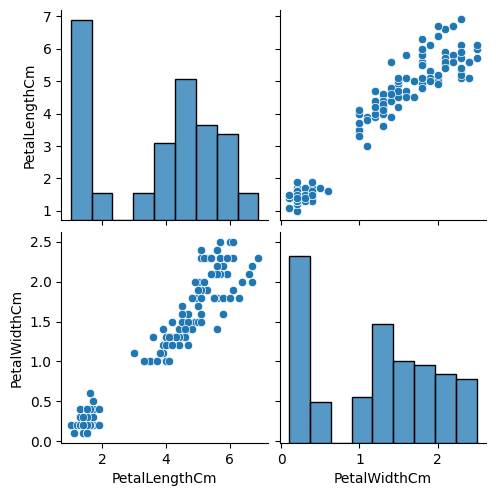

In [10]:
sns.pairplot(data, vars=["PetalLengthCm", "PetalWidthCm"])
plt.show()

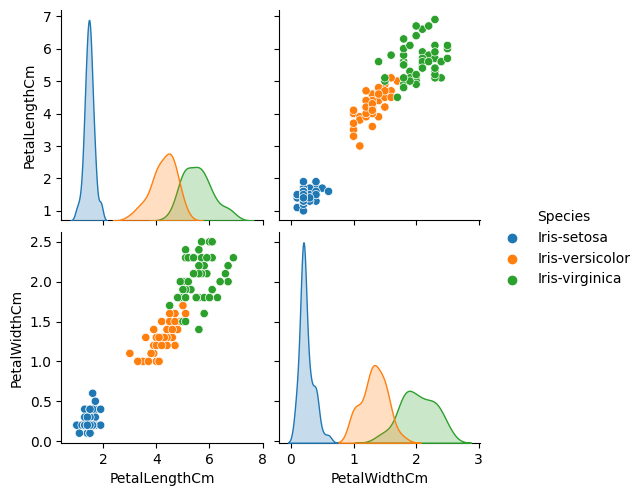

In [11]:
sns.pairplot(data, vars=["PetalLengthCm", "PetalWidthCm"], hue='Species')
plt.show()

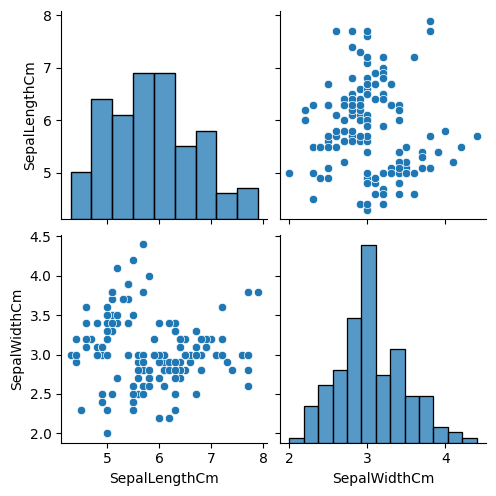

In [12]:
sns.pairplot(data, vars=["SepalLengthCm", "SepalWidthCm"])
plt.show()

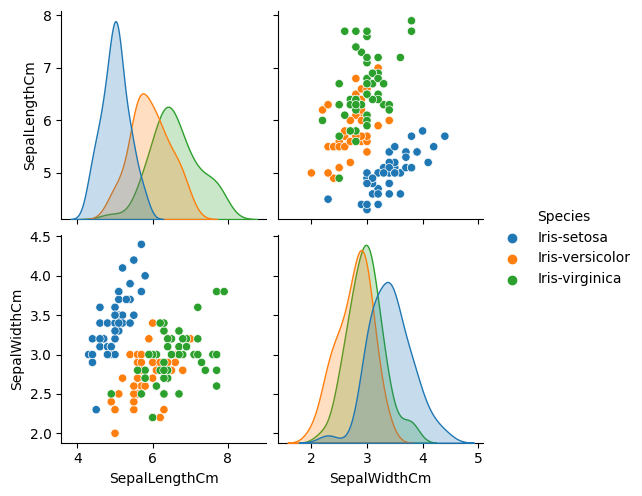

In [13]:
sns.pairplot(data, vars=["SepalLengthCm", "SepalWidthCm"], hue='Species')
plt.show()

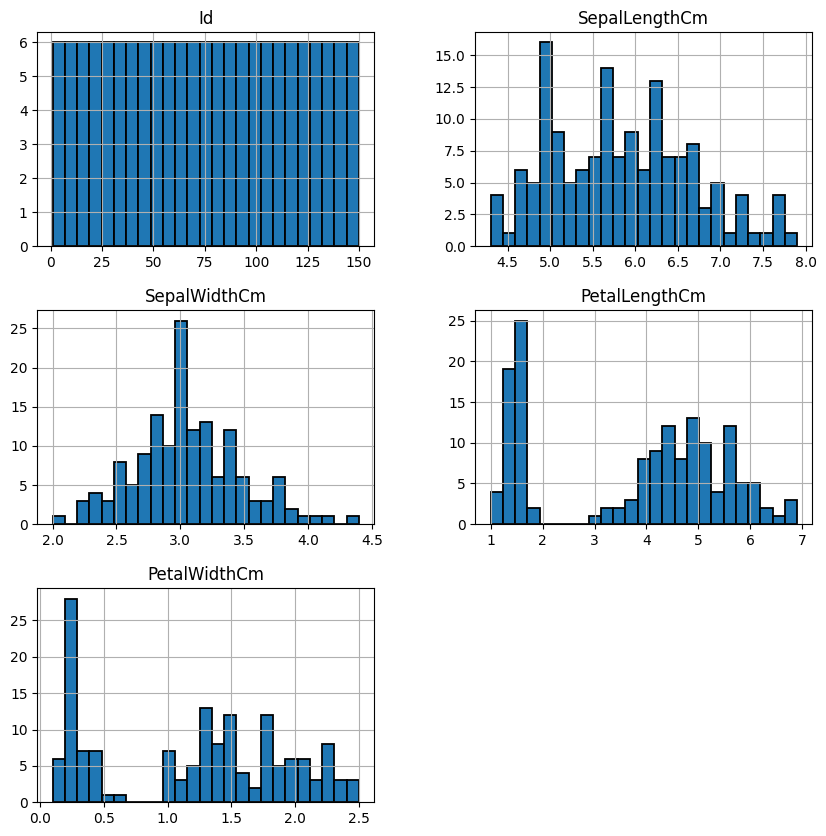

In [14]:
data.hist(bins=25, edgecolor='black', linewidth=1.3, figsize=(10,10))
plt.show()

# K-Means Clustering

In [15]:
X = data.iloc[:, 1:5].values


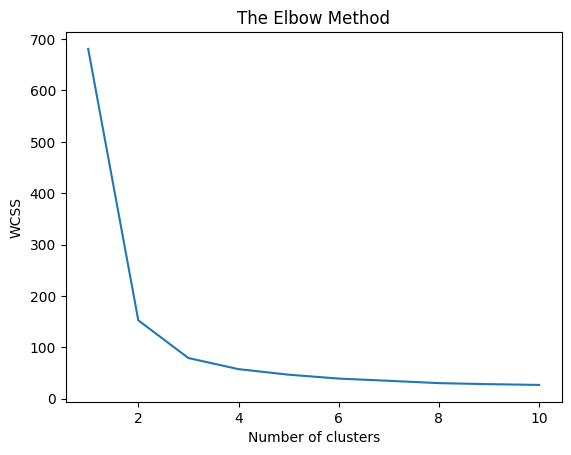

In [16]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

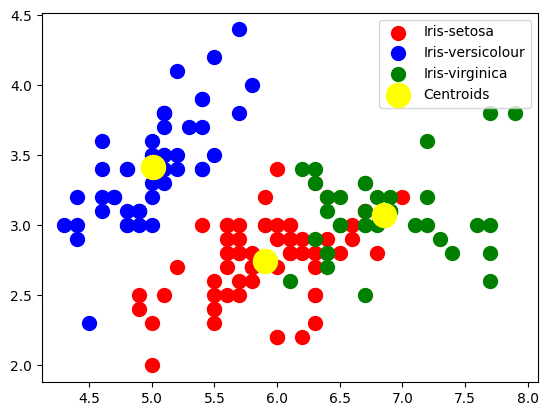

In [18]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

# AgglomerativeClustering


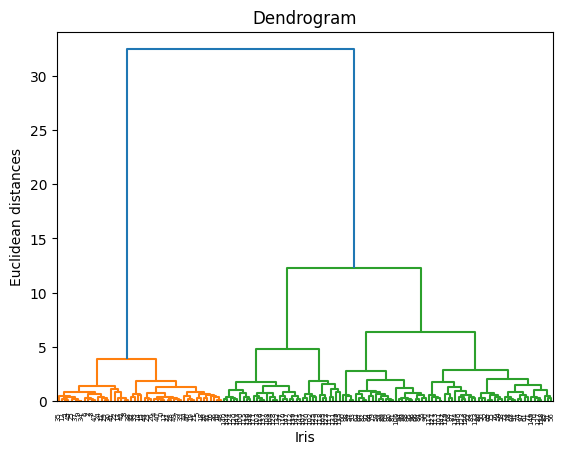

In [19]:
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Iris')
plt.ylabel('Euclidean distances')
plt.show()

In [20]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

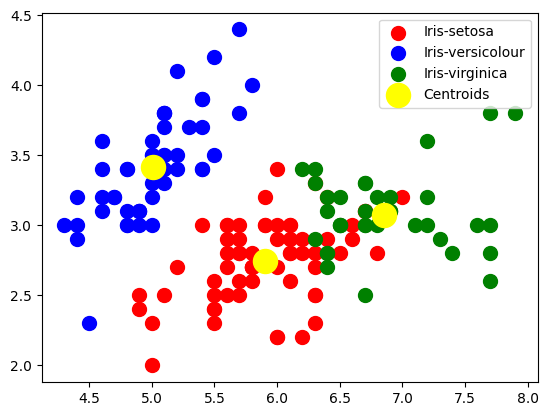

In [21]:
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red',label = 'Iris-setosa')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(X[y_hc == 2, 0], X[y_hc== 2, 1], s = 100, c = 'green', label = 'Iris-virginica')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()